In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных из репозитория

In [3]:
# train
train = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Train.csv')
train.head(2)


,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [4]:
# test
test = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Test.csv')
test.head()

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.60,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.50,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN
2,CAX_Test_3,45645,418000,949,23.30,79.90,32.88,360,334000.0,4.75,...,Single Detached,60,K2H,30-34,Male,70000,8,72,730,NaN
3,CAX_Test_4,45646,693000,3059,42.45,80.00,42.59,360,554400.0,4.25,...,Single Detached,24,L3R,Under 25,Female,90000,2,44-45,786,NaN
4,CAX_Test_5,45647,324000,1554,42.97,75.00,43.48,360,243000.0,4.00,...,Single Detached,12,L2S,35-39,Male,48000,2,56,787,NaN


In [5]:
train.dtypes

Unique_ID             object
MORTGAGE NUMBER        int64
PROPERTY VALUE         int64
MORTGAGE PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE AMOUNT      float64
RATE                 float64
MORTGAGE PURPOSE      object
PAYMENT FREQUENCY     object
PROPERTY TYPE         object
TERM                   int64
FSA                   object
AGE RANGE             object
GENDER                object
INCOME                 int64
INCOME TYPE            int64
NAICS CODE            object
CREDIT SCORE           int64
RESULT                object
dtype: object

In [6]:
# Переименую колонки для удобного обращения к ним

train = train.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [7]:
test = test.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

test.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.6,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.5,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN


In [8]:
# Зависимый признак RESULT перекодирую в 1,0
train = pd.concat([train, pd.get_dummies(train['RESULT'], prefix ='RESULT')], axis=1)

train = train.drop(['RESULT', 'RESULT_NOT FUNDED'], axis=1)
train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT_FUNDED
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,1
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,1


## Feature engineering

Для первой модели я удалю все GENDER = 'unknown' и признаки FSA (Почтовый индекс), GDS

UPD: Поскольку в тестовых выборках тоже есть неизвестный пол. Мне стоит либо совсем исключить GENDER, либо научиться его предсказывать. Для начала исключу

In [109]:
#train_1 = train[train.GENDER != 'Unknown']
#train_1 = train_1.drop(['FSA', 'GDS'], axis=1)

train_1 = train.drop(['FSA', 'GDS', 'GENDER', 'NAICS_CODE', 'AMORTIZATION', 'PROPERTY_TYPE', 'INCOME_TYPE'], axis=1)

In [110]:
# Перекодируем AGE_RANGE в числовой формат со средним по диапазону возраста
pd.options.mode.chained_assignment = None  # default='warn'


train_1.AGE_RANGE[train_1.AGE_RANGE == 'Under 25'] = '0-25'
train_1.AGE_RANGE[train_1.AGE_RANGE == '70 and over'] = '70-100'

# Функция среднего
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

train_1['AGE_MEAN'] = train_1['AGE_RANGE'].apply(lambda x: split_mean(x))
train_1 = train_1.drop('AGE_RANGE', axis=1)

In [111]:
# в MORTGAGE_PURPOSE закодирую только Purchase
train_1['MORTGAGE_PURPOSE'] = np.where(train_1['MORTGAGE_PURPOSE'].str.contains('Purchase'), 1, 0)

In [112]:
# в PAYMENT_FREQUENCY только Monthly
train_1['PAYMENT_FREQUENCY'] = np.where(train_1['PAYMENT_FREQUENCY'].str.contains('Monthly'), 1, 0)

#### One-hot encoding

In [39]:
#train_1 = pd.concat([train_1,pd.get_dummies(train_1['FSA'], prefix ='FSA')], axis=1)
#train_1 = train_1.drop('FSA', axis=1)

In [40]:
# создам train со сбалансированным y
train_res_1 = train_1[train.RESULT_FUNDED == 1].sample(20000)

train_res_0 = train_1[train.RESULT_FUNDED == 0]

train_1 = train_res_1.append(train_res_0)

In [83]:
len(train_1)

45642

In [84]:
# Разделю выборку и удалю ненужные фичи
x = train_1.drop(['MORTGAGE_NUMBER','RESULT_FUNDED', 'Unique_ID'], axis=1)
y = train_1.RESULT_FUNDED

# Разделим данные на train и test в пропорции 0,75/0,25
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

### XGBoost

In [85]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score

In [86]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( 
    learning_rate =0.1, 
    n_estimators=1000, 
    max_depth=5,
    min_child_weight=1, 
    gamma=0, 
    subsample=0.8, 
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, 
    seed=27), param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=5)




In [87]:
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

#### Валидация

In [88]:
# Предскажем класс на тестовой выборке
best_bst = gsearch1.best_estimator_
preds = best_bst.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix')

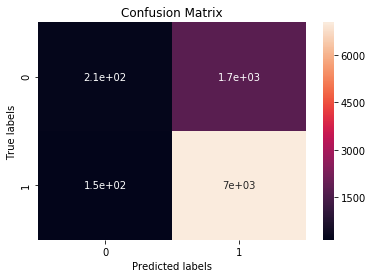

In [89]:
# Построим матрицу ошибок
df = confusion_matrix(y_test,preds)

# Визуализируем матрицу
ax = plt.subplot()
sns.heatmap(df, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [90]:
# Посмотрим точность модели
print('F1-метрика модели:', f1_score(y_test,preds))

F1-метрика модели: 0.8818404061931926


### Подготовка результатов

In [102]:
test_1 = test.drop(['FSA', 'GDS', 'GENDER', 'NAICS_CODE', 'AMORTIZATION', 'PROPERTY_TYPE', 'INCOME_TYPE'], axis=1)

# Перекодируем AGE_RANGE в числовой формат со средним по диапазону возраста
pd.options.mode.chained_assignment = None  # default='warn'

test_1.AGE_RANGE[test_1.AGE_RANGE == 'Under 25'] = '0-25'
test_1.AGE_RANGE[test_1.AGE_RANGE == '70 and over'] = '70-100'

test_1['AGE_MEAN'] = test_1['AGE_RANGE'].apply(lambda x: split_mean(x))
test_1 = test_1.drop('AGE_RANGE', axis=1)

# в MORTGAGE_PURPOSE закодирую только Purchase
test_1['MORTGAGE_PURPOSE'] = np.where(test_1['MORTGAGE_PURPOSE'].str.contains('Purchase'), 1, 0)

# в PAYMENT_FREQUENCY только Monthly
test_1['PAYMENT_FREQUENCY'] = np.where(test_1['PAYMENT_FREQUENCY'].str.contains('Monthly'), 1, 0)

In [98]:
x_test1 = test_1.drop(['MORTGAGE_NUMBER','Unique_ID','RESULT'], axis=1)

Result_Predicted = best_bst.predict(x_test1)

d = {'Unique_ID': test_1.Unique_ID,
    'Result_Predicted': Result_Predicted}

result = pd.DataFrame(data=d)

In [100]:
result.Result_Predicted[result.Result_Predicted == 1] = 'FUNDED'
result.Result_Predicted[result.Result_Predicted == 0] = 'NOT FUNDED'

In [101]:
# Сохраняю результат
result.to_csv('CAX_MortgageModeling_SubmissionFormat_xgb_param_4.csv', index=False)